# WeRateDogs Analysis Project


# Table of contents

1. [Gathering Data](#Gathering-Data)
2. [Assessing Data](#Assessing-Data)
3. [Cleaning-Data](#Cleaning-Data)
4. [Storing, Analyzing, and Visualizing Data](#Analyzing-Data)

## 1. Gathering Data <a name="Gathering-Data"></a>

In [130]:
# Import packages
import pandas as pd
import json
import tweepy
import requests
import re
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 

### 1.1 WeRateDogs Twitter archive data <a name="1-1"></a>

In [2]:
# Read WeRateDogs Twitter archive data
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

# Show the first 5 lines
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 1.2 Tweet image prediction data

In [3]:
#  Retrieve the tweet image predictions from Udacity's servers
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

# Write the data into file image_predictions.tsv
open('image_predictions.tsv', 'wb').write(r.content)

# Read the tsv file 
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

# Show the first 5 lines
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 1.3 Twitter API Data

In [4]:
# Using Twitter API to access new data
consumer_key = 'x'
consumer_secret = 'x'
access_token = 'x'
access_secret = 'x'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [6]:
# Save each tweet id's json data to "tweet_json.txt" file
id_errors = {}
for tweet_id in twitter_archive['tweet_id']:
    try:
        # Get tweet JSON data via tweet ID using Tweepy 
        tweet = api.get_status(tweet_id, tweet_mode='extended',parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        #Save each tweet id's json data to tweet_json.txt file
        with open('tweet_json.txt', 'a') as outfile:
            json.dump(tweet, outbfile)
            outfile.write('\n')
    # Catch all exceptions e.g. id deleted
    except Exception as e:
        print(str(tweet_id) + ": " + str(e))
        id_errors[str(tweet_id)] = str(e)
           

888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921: [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937: [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745: [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329: [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744: [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320: [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130: [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560: [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705: [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984: [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648: [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778: [{'code': 144, 'mess

Rate limit reached. Sleeping for: 404


759566828574212096: [{'code': 144, 'message': 'No status found with that ID.'}]
754011816964026368: [{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288: [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 645


In [9]:
# Write error info to "id_errors.csv" file
pd.DataFrame.from_dict(data=id_errors, orient='index').to_csv('id_errors.csv', header=False)


In [4]:
# Select targeted data from tweet_json.txt

df_list = []

with open('tweet_json.txt',"r") as json_file: 
    for line in json_file:
        tweet = json.loads(line)
        df_list.append({'tweet_id': tweet['id'],
                        'tweet_text': tweet['full_text'],
                        'created_at': tweet['created_at'],
                        'favorites': tweet['favorite_count'],
                       're_tweets': tweet['retweet_count']})

In [6]:
# Save df_list into DataFrame
df_api = pd.DataFrame(df_list)
df_api

,tweet_id,tweet_text,created_at,favorites,re_tweets
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Tue Aug 01 16:23:56 +0000 2017,35120,7404
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tue Aug 01 00:17:27 +0000 2017,30393,5513
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Mon Jul 31 00:18:03 +0000 2017,22849,3638
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Sun Jul 30 15:58:51 +0000 2017,38405,7582
4,891327558926688256,This is Franklin. He would like you to stop ca...,Sat Jul 29 16:00:24 +0000 2017,36656,8159
...,...,...,...,...,...
2345,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,Mon Nov 16 00:24:50 +0000 2015,94,38
2346,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,Mon Nov 16 00:04:52 +0000 2015,261,122
2347,666033412701032449,Here is a very happy pup. Big fan of well-main...,Sun Nov 15 23:21:54 +0000 2015,107,39
2348,666029285002620928,This is a western brown Mitsubishi terrier. Up...,Sun Nov 15 23:05:30 +0000 2015,117,41


## 2. Assessing Data <a name="Assessing-Data"></a>

### 2.1 dataset twitter_archive

In [7]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The columns of twitter_archive represent:
* tweet_id: the unique identifier for each tweet
* in_reply_to_status_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
* in_reply_to_user_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
* timestamp: time when this Tweet was created
* source: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
* text: actual UTF-8 text of the status update
* retweeted_status_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
* retweeted_status_user_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
* retweeted_status_timestamp: time of retweet
* expanded_urls: tweet URL
* rating_numerator: numerator of the rating of a dog. Note: ratings almost always greater than 10
* rating_denominator: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
* name: name of the dog
* doggo: one of the 4 dog "stage"
* floofer: one of the 4 dog "stage"
* pupper: one of the 4 dog "stage"
* puppo: one of the 4 dog "stage"

(1) the data type of in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be changed from float to int.

In [9]:
# Check duplicated data
twitter_archive.duplicated().sum()

0

In [10]:
# Check retweeted data
twitter_archive[twitter_archive.retweeted_status_id.isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [11]:
# Check replied data
twitter_archive[twitter_archive.in_reply_to_status_id.isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


（2）181 tweets are re-tweeted and 78 tweets are replied which should be removed as we only want original ratings.

In [12]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
twitter_archive.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

(3) rating_denominator has number other than 10. 

In [14]:
twitter_archive.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [15]:
pd.set_option('display.max_colwidth', None)

In [16]:
twitter_archive[twitter_archive['rating_numerator'] == 1776]['text']

979    This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Name: text, dtype: object

In [17]:
twitter_archive[twitter_archive['rating_numerator'] == 960]['text']

313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object

In [18]:
twitter_archive[twitter_archive['rating_numerator'] == 0]['text']

315           When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
1016    PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
Name: text, dtype: object

(4) rating_numerator has very high numbers. (1776 is right, 960 was wrongly extracted, two with 
0 are not dog ratings)

In [19]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Rooney       1
Mauve        1
Sweet        1
Divine       1
Bradley      1
Name: name, Length: 957, dtype: int64

In [20]:
twitter_archive[twitter_archive['name']=='a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a taco. We only rate dogs. Please o

(5) some dog names are 'a' (wrong extration)

In [21]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [22]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [23]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [24]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [25]:
# Check tweets whose dog stage is both puppo and pupper
twitter_archive[(twitter_archive['puppo']=='puppo') & (twitter_archive['pupper']=='pupper')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [26]:
# Check tweets whose dog stage is both puppo and doggo
twitter_archive[(twitter_archive['puppo']=='puppo') & (twitter_archive['doggo']=='doggo')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo


In [27]:
# Check tweets whose dog stage is both pupper and doggo
twitter_archive[(twitter_archive['pupper']=='pupper') & (twitter_archive['doggo']=='doggo')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,"https://twitter.com/dog_rates/status/741067306818797568/photo/1,https://twitter.com/dog_rates/status/741067306818797568/photo/1",12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,Non

(6) some dogs have more than one dog stage (wrongly extrated & two dogs in a pic). Besides, the data type of variables regarding dog stage should be changed.

In [28]:
# Check if there's duplicated data
twitter_archive.duplicated().sum()

0

In [29]:
# Check if tweet did not have picture
twitter_archive[~twitter_archive.tweet_id.isin(image_predictions.tweet_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj,NaN,NaN,NaN,https://twitter.com/kaijohnson_19/status/883965650754039809,13,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After countless hours of research and hundreds of formula alterations we have concluded that Dug should be bumped to an 11/10,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None


(7) 281 tweets dont have pictures.

(8) Source should be trancated

### 2.2 image_predictions

In [30]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


* tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
* p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
* p1_conf is how confident the algorithm is in its #1 prediction → 95%
* p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
* p2 is the algorithm's second most likely prediction → Labrador retriever
* p2_conf is how confident the algorithm is in its #2 prediction → 1%
* p2_dog is whether or not the #2 prediction is a breed of dog → TRUE


In [31]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [32]:
# Check if there's duplicated data
image_predictions.duplicated().sum()

0

In [33]:
# Check if there's duplicated picture
image_predictions.jpg_url.duplicated().sum()

66

In [34]:
image_predictions[image_predictions.jpg_url.duplicated(keep=False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True


(9) There are some duplicated data in pic prediction like 868880397819494401 and 873697596434513921	

In [35]:
# Check if the order of the prediction is right
(image_predictions['p1_conf']<image_predictions['p2_conf']).sum()

0

In [36]:
(image_predictions['p2_conf']<image_predictions['p3_conf']).sum()

0

(10) some dog breeds starts with capital alphabet and some don't.

In [37]:
#check duplicated
df_api.duplicated().sum()

18

### 2.3 API data
(11) some infos are not avaliable

(12) have duplicated data

### 2.4 Summary of data assessment:
#### Quality
**twitter_archive**

(1) 181 tweets are re-tweeted, and 78 tweets are replied which should be removed as we only want original ratings.

(2) The data type of in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be changed from float to int.

(3) Variable 'rating_denominator' has number other than 10.

(4) Variable 'rating_numerator' has wrongly extracted. (e.g. the one has rating of 960)

(5) Some tweets are not dog rating tweets, such as a tweet with 0 rating.

(6) Some dog names are wrongly extracted, such as 'a'.

(7) Some dogs have more than one dog stage (wrongly extracted & two dogs in a pic).

(8) 281 tweets don't have pictures.

(9) Source should be truncated.

**image_predictions**

(10) There are some duplicated data in pic prediction. (e.g. tweet_id 868880397819494401 and 873697596434513921)

(11) Some dog breeds starts with capital alphabet and some don't.

**df_api**

(13) Some tweets are not avaliable, resulting in missing retweet count or favorite count.
(14) There are duplicated data that should be removed.
#### Tidiness
(1) Should be integrated into one dataset

(2) dog stage into one variable

## 3. Cleaning Data <a name="Cleaning-Data"></a>

In [38]:
# Make copies for data set
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
df_api_clean = df_api.copy()


### 3.1 Quality issues

**Define**
1. Delete data that are retweets or replies and drop useless columns.


**Code:**

In [39]:
# Delete data that are retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull() == True]
# Delete data that are replys
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull() == True]

In [40]:
# Drop colomns 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp'
twitter_archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)
# Drop colomns 'in_reply_to_status_id', 'in_reply_to_user_id'
twitter_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

**Test:**

In [41]:
# Test
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


**Define**

2. Deal with variable 'rating_denominator' that has number other than 10.

(1) Some were wrongly extraction: both rating_denominator and rating_numerator need adjusted to right ones. (Index 1068, 1165, 1202, 1662, 2335)

(2) Some tweets have more than one dogs: rating_denominator and rating_numerator need to be averaged. (index: 433,902,1120,1228,1254,1274,1351,1433,1635,1779,1843)

(3) Some are not dog rating tweets: need to be deleted. (Index 516)

In [42]:
# Check the values of 'rating_denominator'
twitter_archive_clean.rating_denominator.value_counts().sort_index()

2         1
7         1
10     2080
11        2
20        1
40        1
50        3
70        1
80        2
90        1
110       1
120       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [43]:
# Check data that has 'rating_denominator' other than 10
twitter_archive_clean[twitter_archive_clean['rating_denominator']!=10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,None,None,None,None


**Code:**

In [44]:
# Index 1068 - wrongly extration: change the rating_denominator to 10 and rating_numerator to 14.
twitter_archive_clean.loc[twitter_archive_clean.index == 1068,'rating_numerator']=14
twitter_archive_clean.loc[twitter_archive_clean.index == 1068,'rating_denominator']=10

# Index 1165 - wrongly extration: change the rating_denominator to 10 and rating_numerator to 13.
twitter_archive_clean.loc[twitter_archive_clean.index == 1165,'rating_numerator']=13
twitter_archive_clean.loc[twitter_archive_clean.index == 1165,'rating_denominator']=10

# Index 1202 - wrongly extration: change the rating_denominator to 10 and rating_numerator to 11.
twitter_archive_clean.loc[twitter_archive_clean.index == 1202,'rating_numerator']=11
twitter_archive_clean.loc[twitter_archive_clean.index == 1202,'rating_denominator']=10

# Index 1662 - wrongly extration: change the rating_denominator to 10 and rating_numerator to 10.
twitter_archive_clean.loc[twitter_archive_clean.index == 1662,'rating_numerator']=10
twitter_archive_clean.loc[twitter_archive_clean.index == 1662,'rating_denominator']=10

# Index 2335 - wrongly extration: change the rating_denominator to 10 and rating_numerator to 9.
twitter_archive_clean.loc[twitter_archive_clean.index == 2335,'rating_numerator']=9
twitter_archive_clean.loc[twitter_archive_clean.index == 2335,'rating_denominator']=10



In [45]:
# Not dog rating tweet: need to be deleted (index 516)
twitter_archive_clean = twitter_archive_clean.drop(labels=516, axis=0)


In [46]:
# Pic with many dogs should be averaged (index: 433,902,1120,1228,1254,1274,1351,1433,1635,1779,1843)

# 1. adjust the rating_numerator
twitter_archive_clean.loc[twitter_archive_clean['rating_denominator']>10,'rating_numerator']= twitter_archive_clean['rating_numerator']/twitter_archive_clean['rating_denominator']*10
twitter_archive_clean[twitter_archive_clean['rating_denominator']>10]

# 2. change the denominator as 10
twitter_archive_clean.loc[twitter_archive_clean['rating_denominator']>10,'rating_denominator']=10

**Test:**

In [47]:
# Test: Check the values of 'rating_denominator'
twitter_archive_clean.rating_denominator.value_counts().sort_index()

10    2096
Name: rating_denominator, dtype: int64

**Define:**

3. Deal with variable 'rating_numerator' that has extreme values.

(1) A tweet that is not dog rating, need deleted. (Index 315)

(2) Some tweets are wrongly extraction and need adjusted. (Index 695, 763, 1712)

In [48]:
# Check the values of 'rating_numerator'
twitter_archive_clean.rating_numerator.value_counts().sort_index()

0.0         1
1.0         4
2.0         9
3.0        19
4.0        15
5.0        34
6.0        32
7.0        51
8.0        98
9.0       154
10.0      438
11.0      419
12.0      490
13.0      288
14.0       39
26.0        1
27.0        1
75.0        1
420.0       1
1776.0      1
Name: rating_numerator, dtype: int64

In [49]:
twitter_archive_clean[twitter_archive_clean['rating_numerator']<2]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0.0,10,None,None,None,None,None
1869,675153376133427200,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,https://twitter.com/dog_rates/status/675153376133427200/photo/1,1.0,10,None,None,None,None,None
2091,670783437142401025,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO,https://twitter.com/dog_rates/status/670783437142401025/photo/1,1.0,10,None,None,None,None,None
2261,667549055577362432,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,https://twitter.com/dog_rates/status/667549055577362432/photo/1,1.0,10,None,None,None,None,None
2338,666104133288665088,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1.0,10,None,None,None,None,None


In [50]:
twitter_archive_clean[twitter_archive_clean['rating_numerator']>16]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75.0,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27.0,10,Sophie,None,None,pupper,None
979,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10,Atticus,None,None,None,None
1712,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26.0,10,None,None,None,None,None
2074,670842764863651840,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10,None,None,None,None,None


**Code:**

In [51]:
# 315 not dog rating: deleted
twitter_archive_clean = twitter_archive_clean.drop(labels=315, axis=0)


# Wrongly extraction: 695,763,1712
twitter_archive_clean.loc[twitter_archive_clean.index == 695,'rating_numerator']=9.75
twitter_archive_clean.loc[twitter_archive_clean.index == 763,'rating_numerator']=11.27
twitter_archive_clean.loc[twitter_archive_clean.index == 1712,'rating_numerator']=11.26


**Test:**

In [52]:
# Test: Check the values of 'rating_numerator'
twitter_archive_clean.rating_numerator.value_counts().sort_index()

1.00         4
2.00         9
3.00        19
4.00        15
5.00        34
6.00        32
7.00        51
8.00        98
9.00       154
9.75         1
10.00      438
11.00      419
11.26        1
11.27        1
12.00      490
13.00      288
14.00       39
420.00       1
1776.00      1
Name: rating_numerator, dtype: int64

**Define:**

4. Deal with dog names that are wrongly extracted, such as 'a','this','the'. They are wrongly extracted and should be change to None.

In [53]:
# Check the values of name
twitter_archive_clean.name.value_counts()

None       602
a           55
Lucy        11
Charlie     11
Cooper      10
          ... 
Ester        1
Jazzy        1
Nico         1
Ruffles      1
Hector       1
Name: name, Length: 955, dtype: int64

In [54]:
# Check data with lower capital in names
twitter_archive_clean[twitter_archive_clean['name'].str.islower()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,https://twitter.com/dog_rates/status/887517139158093824/video/1,14.0,10,such,None,None,None,None
56,881536004380872706,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,https://twitter.com/dog_rates/status/881536004380872706/video/1,14.0,10,a,None,None,pupper,None
169,859196978902773760,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,https://twitter.com/dog_rates/status/859196978902773760/video/1,12.0,10,quite,None,None,None,None
193,855459453768019968,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x","https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12.0,10,quite,None,None,None,None
335,832645525019123713,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10.0,10,not,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2.0,10,an,None,None,None,None
2350,666050758794694657,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10.0,10,a,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10,a,None,None,None,None


**Code:**

In [55]:
# Change these names to None
twitter_archive_clean.loc[twitter_archive_clean['name'].str.islower(),'name']='None'

**Test:**

In [56]:
# Test: Check data with lower capital in names
twitter_archive_clean[twitter_archive_clean['name'].str.islower()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [57]:
# Test: Check the values of name
twitter_archive_clean.name.value_counts()

None       706
Charlie     11
Lucy        11
Oliver      10
Cooper      10
          ... 
Beckham      1
Mya          1
Ulysses      1
Laika        1
Tango        1
Name: name, Length: 930, dtype: int64

**Define:**

5. Adjust the data have wrongly extrated dog stages.


In [58]:
twitter_archive_clean.doggo.value_counts()

None     2012
doggo      83
Name: doggo, dtype: int64

In [59]:
# Check first there's dog with two stages
# Check tweets whose dog stage is both puppo and pupper
twitter_archive_clean[(twitter_archive_clean['puppo']=='puppo') & (twitter_archive_clean['pupper']=='pupper')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [60]:
# Check tweets whose dog stage is both puppo and doggo
twitter_archive_clean[(twitter_archive_clean['puppo']=='puppo') & (twitter_archive_clean['doggo']=='doggo')]

# index 191 - is not doggo

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13.0,10,None,doggo,None,None,puppo


In [61]:
# Check tweets whose dog stage is both pupper and doggo
twitter_archive_clean[(twitter_archive_clean['pupper']=='pupper') & (twitter_archive_clean['doggo']=='doggo')]

# index 705,956 - is not pupper
# index 460,575,956 - is not doggo
# index 531,733,889,1063,1113 - two dogs in pic
# 889,531, name should be two names

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,13.0,10,Dido,doggo,None,pupper,None
531,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12.0,10,None,doggo,None,pupper,None
575,801115127852503040,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12.0,10,Bones,doggo,None,pupper,None
705,785639753186217984,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10.0,10,Pinot,doggo,None,pupper,None
733,781308096455073793,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",https://vine.co/v/5rgu2Law2ut,12.0,10,None,doggo,None,pupper,None
889,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12.0,10,Maggie,doggo,None,pupper,None
956,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5.0,10,None,doggo,None,pupper,None
1063,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12.0,10,None,doggo,None,pupper,None
1113,733109485275860992,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",https://twitter.com/dog_rates/status/733109485275860992/photo/1,12.0,10,None,doggo,None,pupper,None


In [62]:
# Check tweets whose dog stage is both puppo and floofer
twitter_archive_clean[(twitter_archive_clean['puppo']=='puppo') & (twitter_archive_clean['floofer']=='floofer')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [63]:
# Check tweets whose dog stage is both pupper and floofer
twitter_archive_clean[(twitter_archive_clean['pupper']=='pupper') & (twitter_archive_clean['floofer']=='floofer')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [64]:
# Check tweets whose dog stage is both doggo and floofer
twitter_archive_clean[(twitter_archive_clean['doggo']=='doggo') & (twitter_archive_clean['floofer']=='floofer')]
# 200 is not floofer

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11.0,10,None,doggo,floofer,None,None


**Code:**

In [65]:
# Adjust the wrong dog stage
# index 191,460,575,956 - is not doggo
twitter_archive_clean.loc[twitter_archive_clean.index == 191,'doggo']='None'
twitter_archive_clean.loc[twitter_archive_clean.index == 460,'doggo']='None'
twitter_archive_clean.loc[twitter_archive_clean.index == 575,'doggo']='None'
twitter_archive_clean.loc[twitter_archive_clean.index == 956,'doggo']='None'
# index 705,956 - is not pupper
twitter_archive_clean.loc[twitter_archive_clean.index == 705,'pupper']='None'
twitter_archive_clean.loc[twitter_archive_clean.index == 956,'pupper']='None'
# 200 is not floofer
twitter_archive_clean.loc[twitter_archive_clean.index == 200,'floofer']='None'

In [66]:
# index 531,733,889,1063,1113 - two dogs in pic
# 889,531, name should be two names
twitter_archive_clean.loc[twitter_archive_clean.index == 531,'name']='Burke, Dexter'
twitter_archive_clean.loc[twitter_archive_clean.index == 889,'name']='Maggie, Lila'

**Test:**

In [67]:
twitter_archive_clean[(twitter_archive_clean['pupper']=='pupper') & (twitter_archive_clean['doggo']=='doggo')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
531,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12.0,10,"Burke, Dexter",doggo,None,pupper,None
733,781308096455073793,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",https://vine.co/v/5rgu2Law2ut,12.0,10,None,doggo,None,pupper,None
889,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12.0,10,"Maggie, Lila",doggo,None,pupper,None
1063,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12.0,10,None,doggo,None,pupper,None
1113,733109485275860992,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",https://twitter.com/dog_rates/status/733109485275860992/photo/1,12.0,10,None,doggo,None,pupper,None


**Define:**

6. Remove tweets did not have pictures (not in image_predictions_clean).

In [68]:
twitter_archive_clean.shape

(2095, 12)

**Code:**

In [69]:
# Remove data that both tweet_id and in_reply_to_status_id not in image_predictions_clean.
twitter_archive_clean = twitter_archive_clean[(twitter_archive_clean.tweet_id.isin(image_predictions_clean.tweet_id))]

**Test:**

In [70]:
# Test
twitter_archive_clean.shape

(1969, 12)

**Define:**

7. Truncated variable source to 'Twitter for (platform)'.

In [71]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1930
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

**Code:**

In [72]:
# Replace with the truncated info
twitter_archive_clean = twitter_archive_clean.replace({'source' : { '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' : 'Twitter for iPhone', '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' : 'Twitter Web Client', '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' : 'TweetDeck' }})

**Test:**

In [73]:
# Test
twitter_archive_clean.source.value_counts()

Twitter for iPhone    1930
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

**Define:**

8. Change all the types predictions to words with the first letter capitalised.

**Code:**

In [74]:
# use str.capitalize() to adjust
image_predictions_clean.p1 = image_predictions_clean.p1.str.capitalize()
image_predictions_clean.p2 = image_predictions_clean.p2.str.capitalize()
image_predictions_clean.p3 = image_predictions_clean.p3.str.capitalize()

**Test:**

In [75]:
# Test
print(image_predictions_clean.p1.str.islower().sum())
print(image_predictions_clean.p2.str.islower().sum())
print(image_predictions_clean.p3.str.islower().sum())

0
0
0


**9. Remove duplicated data and useless columns in df_api_clean.**


In [76]:
# Check duplicated data in df_api_clean.
df_api_clean.duplicated().sum()

18

**Code:**

In [77]:
# Remove duplicated data
df_api_clean.drop_duplicates(inplace=True)

In [78]:
# Drop useless columns
df_api_clean.drop(columns=['tweet_text', 'created_at'], inplace=True)

**Test:**

In [79]:
# Test
df_api_clean.duplicated().sum()

0

In [80]:
df_api_clean.head()

,tweet_id,favorites,re_tweets
0,892420643555336193,35120,7404
1,892177421306343426,30393,5513
2,891815181378084864,22849,3638
3,891689557279858688,38405,7582
4,891327558926688256,36656,8159


In [81]:
# Test
df_api_clean.head()

,tweet_id,favorites,re_tweets
0,892420643555336193,35120,7404
1,892177421306343426,30393,5513
2,891815181378084864,22849,3638
3,891689557279858688,38405,7582
4,891327558926688256,36656,8159


In [82]:
# check if there's duplicated tweet_id
df_api_clean.tweet_id.duplicated().sum()

1

In [83]:
df_api_clean[df_api_clean.tweet_id.duplicated(keep=False)]

,tweet_id,favorites,re_tweets
3,891689557279858688,38405,7582
22,891689557279858688,38403,7582


In [84]:
# Keep the newer data
df_api_clean = df_api_clean.drop(labels=3, axis=0)

In [85]:
# Test
df_api_clean.tweet_id.duplicated().sum()

0

### 3.2 Tidiness
**Define:**
1. Integrate three datasets into one. Drop data with incomplete information.

**Code:**

In [86]:
# integrate twitter_archive_clean with df_api
df_twitter1 = pd.merge(twitter_archive_clean, df_api_clean, 
                      how = 'inner', on = ['tweet_id'])
df_twitter1

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,re_tweets
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,None,None,None,None,35120,7404
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,None,None,None,None,30393,5513
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,None,None,None,None,22849,3638
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,None,None,None,None,38403,7582
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,None,None,None,None,36656,8159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,666049248165822465,2015-11-16 00:24:50 +0000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10,None,None,None,None,None,94,38
1958,666044226329800704,2015-11-16 00:04:52 +0000,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10,None,None,None,None,None,261,122
1959,666033412701032449,2015-11-15 23:21:54 +0000,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10,None,None,None,None,None,107,39
1960,666029285002620928,2015-11-15 23:05:30 +0000,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10,None,None,None,None,None,117,41


In [87]:
# integrate df_twitter1 with image_predictions_clean
df_cleaned = pd.merge(df_twitter1, image_predictions_clean, 
                      how = 'inner', on = ['tweet_id'])
df_cleaned

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,None,None,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,None,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,None,None,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,None,None,...,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,None,None,...,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,666049248165822465,2015-11-16 00:24:50 +0000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10,None,None,None,...,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1958,666044226329800704,2015-11-16 00:04:52 +0000,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10,None,None,None,...,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
1959,666033412701032449,2015-11-15 23:21:54 +0000,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10,None,None,None,...,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
1960,666029285002620928,2015-11-15 23:05:30 +0000,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10,None,None,None,...,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


**Test:**

In [88]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1961
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1962 non-null   int64  
 1   timestamp           1962 non-null   object 
 2   source              1962 non-null   object 
 3   text                1962 non-null   object 
 4   expanded_urls       1962 non-null   object 
 5   rating_numerator    1962 non-null   float64
 6   rating_denominator  1962 non-null   int64  
 7   name                1962 non-null   object 
 8   doggo               1962 non-null   object 
 9   floofer             1962 non-null   object 
 10  pupper              1962 non-null   object 
 11  puppo               1962 non-null   object 
 12  favorites           1962 non-null   int64  
 13  re_tweets           1962 non-null   int64  
 14  jpg_url             1962 non-null   object 
 15  img_num             1962 non-null   int64  
 16  p1    

**Define:**

2. dog stage into one variable.

**Code:**

In [89]:
# Change value='None' to NaN
df_cleaned.loc[df_cleaned.doggo=='None','doggo']=None
df_cleaned.loc[df_cleaned.floofer=='None','floofer']=None
df_cleaned.loc[df_cleaned.puppo=='None','puppo']=None
df_cleaned.loc[df_cleaned.pupper=='None','pupper']=None

In [90]:
# find dog stage variable index
print(df_cleaned.columns.get_loc('doggo'),df_cleaned.columns.get_loc('floofer'),df_cleaned.columns.get_loc('puppo'),df_cleaned.columns.get_loc('pupper'))

8 9 11 10


In [91]:
# Merge into dog stage (https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas)
df_cleaned['dog_stage'] = df_cleaned[df_cleaned.columns[8:12]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

In [92]:
df_cleaned['dog_stage'].value_counts()

                1661
pupper           203
doggo             64
puppo             23
floofer            7
doggo,pupper       4
Name: dog_stage, dtype: int64

In [93]:
# drop useless columns
df_cleaned.drop(columns=['doggo', 'floofer','puppo','pupper'], inplace=True)

**Test:**

In [94]:
df_cleaned

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,re_tweets,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,35120,7404,...,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,30393,5513,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,22849,3638,...,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,38403,7582,...,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,36656,8159,...,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,666049248165822465,2015-11-16 00:24:50 +0000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10,None,94,38,...,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,
1958,666044226329800704,2015-11-16 00:04:52 +0000,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10,None,261,122,...,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True,
1959,666033412701032449,2015-11-15 23:21:54 +0000,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10,None,107,39,...,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,
1960,666029285002620928,2015-11-15 23:05:30 +0000,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10,None,117,41,...,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,


**Define:**

Column expanded_urls is useless, which should be dropped.

**Code:**

In [95]:
# drop useless columns
df_cleaned.drop(columns=['expanded_urls'], inplace=True)

**Test:**

In [96]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1961
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1962 non-null   int64  
 1   timestamp           1962 non-null   object 
 2   source              1962 non-null   object 
 3   text                1962 non-null   object 
 4   rating_numerator    1962 non-null   float64
 5   rating_denominator  1962 non-null   int64  
 6   name                1962 non-null   object 
 7   favorites           1962 non-null   int64  
 8   re_tweets           1962 non-null   int64  
 9   jpg_url             1962 non-null   object 
 10  img_num             1962 non-null   int64  
 11  p1                  1962 non-null   object 
 12  p1_conf             1962 non-null   float64
 13  p1_dog              1962 non-null   bool   
 14  p2                  1962 non-null   object 
 15  p2_conf             1962 non-null   float64
 16  p2_dog

**Define:**

Drop column rating_denominator as all are 10 and rename rating_numerator as rating

**Code:**

In [97]:
# drop column rating_denominator and rename rating_numerator as rating
df_cleaned.drop(columns=['rating_denominator'], inplace=True)
df_cleaned.rename(columns={"rating_numerator": "rating"}, inplace=True)

**Test:**

In [98]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1961
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   1962 non-null   int64  
 1   timestamp  1962 non-null   object 
 2   source     1962 non-null   object 
 3   text       1962 non-null   object 
 4   rating     1962 non-null   float64
 5   name       1962 non-null   object 
 6   favorites  1962 non-null   int64  
 7   re_tweets  1962 non-null   int64  
 8   jpg_url    1962 non-null   object 
 9   img_num    1962 non-null   int64  
 10  p1         1962 non-null   object 
 11  p1_conf    1962 non-null   float64
 12  p1_dog     1962 non-null   bool   
 13  p2         1962 non-null   object 
 14  p2_conf    1962 non-null   float64
 15  p2_dog     1962 non-null   bool   
 16  p3         1962 non-null   object 
 17  p3_conf    1962 non-null   float64
 18  p3_dog     1962 non-null   bool   
 19  dog_stage  1962 non-null   object 
dtypes: bool(

**Define:**

The dtype of timestamp should be datetime

**Code:**

In [99]:
# Change timestamp into datetime 
df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'])

**Test:**

In [100]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1961
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   1962 non-null   int64              
 1   timestamp  1962 non-null   datetime64[ns, UTC]
 2   source     1962 non-null   object             
 3   text       1962 non-null   object             
 4   rating     1962 non-null   float64            
 5   name       1962 non-null   object             
 6   favorites  1962 non-null   int64              
 7   re_tweets  1962 non-null   int64              
 8   jpg_url    1962 non-null   object             
 9   img_num    1962 non-null   int64              
 10  p1         1962 non-null   object             
 11  p1_conf    1962 non-null   float64            
 12  p1_dog     1962 non-null   bool               
 13  p2         1962 non-null   object             
 14  p2_conf    1962 non-null   float64            
 15  p2_d

## 4. Storing, Analyzing, and Visualizing Data <a name="Analyzing-Data"></a>

In [101]:
# Store the cleaned data into a csv file
df_cleaned.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [102]:
# Read the csv file into DataFrame
df = pd.read_csv('twitter_archive_master.csv')

df.head()

,tweet_id,timestamp,source,text,rating,name,favorites,re_tweets,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,Phineas,35120,7404,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,Tilly,30393,5513,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,Archie,22849,3638,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,Darla,38403,7582,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,Franklin,36656,8159,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


### 4.1 Favorites or retweets
**1. Photo has most favorites or retweets.**

In [103]:
# Find most favorites
df.favorites.max()

151033

In [104]:
# Find most retweets
df.re_tweets.max()

74725

In [105]:
# Find the tweet
df[df.favorites==df.favorites.max()]

# It's the same tweet

,tweet_id,timestamp,source,text,rating,name,favorites,re_tweets,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
761,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,13.0,None,151033,74725,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,Labrador_retriever,0.825333,True,Ice_bear,0.044681,False,Whippet,0.018442,True,doggo


In [106]:
df[df.favorites==df.favorites.max()].jpg_url

761    https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
Name: jpg_url, dtype: object

In [107]:
Image(url= 'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg')

**2. Average favorites and tweets.**

In [108]:
# Find the average favorites
df.favorites.mean()

8069.553516819572

In [109]:
# Find the average retweets
df.re_tweets.mean()

2379.2517838939857

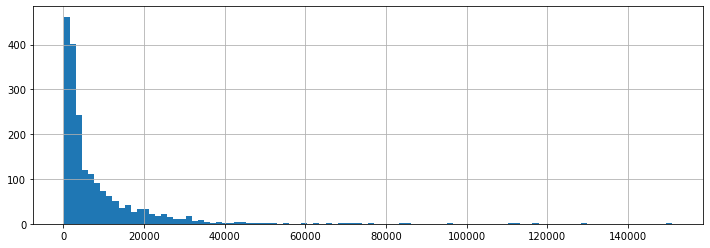

In [110]:
df.favorites.hist(figsize=(12, 4),bins=100);

Most favorites are below 5000.

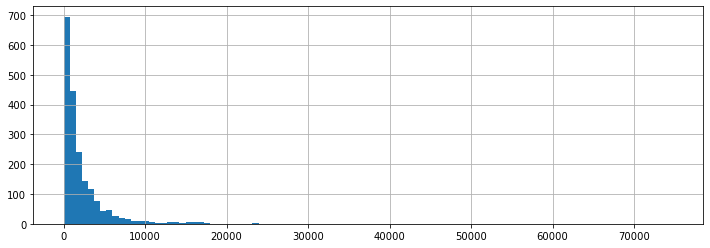

In [111]:
df.re_tweets.hist(figsize=(12, 4),bins=100);

Most retweet are below 3000.

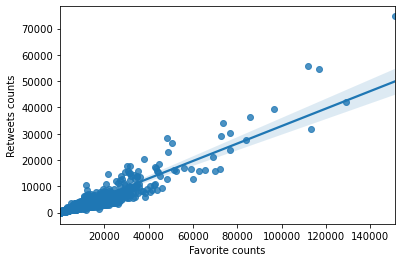

In [132]:
ax = sns.regplot(x="favorites", y="re_tweets", data=df)
ax.set_xlabel("Favorite counts")
ax.set_ylabel("Retweets counts");

There's a positive correlattion between retweets and favorites

In [113]:
# favorites describe
df.favorites.describe()

count      1962.000000
mean       8069.553517
std       11878.614035
min          69.000000
25%        1730.500000
50%        3638.000000
75%       10044.000000
max      151033.000000
Name: favorites, dtype: float64

In [114]:
# retweets describe
df.re_tweets.describe()

count     1962.000000
mean      2379.251784
std       4253.099317
min         11.000000
25%        530.000000
50%       1150.500000
75%       2710.000000
max      74725.000000
Name: re_tweets, dtype: float64

In [135]:
# drop extreme value in 
df_rate = df[df['rating']<420]

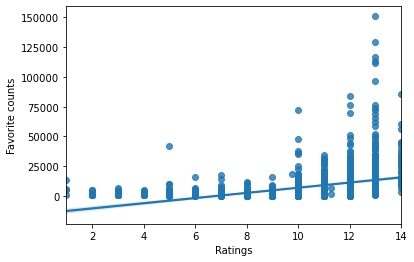

In [141]:
ax = sns.regplot(x="rating", y="favorites", data=df_rate)
ax.set_xlabel("Ratings")
ax.set_ylabel("Favorite counts");

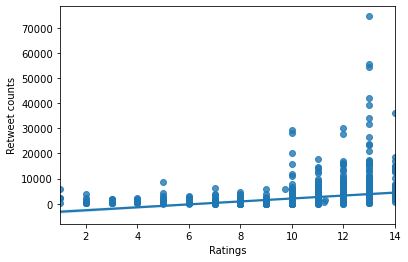

In [142]:
ax = sns.regplot(x="rating", y="re_tweets", data=df_rate)
ax.set_xlabel("Ratings")
ax.set_ylabel("Retweet counts");

### 4.2 Ratings
**1. Photo with highest rating.**

In [115]:
df.rating.max()

1776.0

In [116]:
df[df.rating==df.rating.max()]

,tweet_id,timestamp,source,text,rating,name,favorites,re_tweets,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
714,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,Atticus,4957,2388,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,Bow_tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False,NaN


In [117]:
df[df.rating==df.rating.max()].jpg_url

714    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

In [118]:
Image(url= 'https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg')

**2. Average rating.**

In [119]:
# Average ratings
df.rating.mean()

11.651518858307849

In [120]:
# ratings describe
df.rating.describe()

count    1962.000000
mean       11.651519
std        40.967331
min         1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating, dtype: float64

In [121]:
df.rating.value_counts().sort_index()

1.00         4
2.00         9
3.00        19
4.00        15
5.00        33
6.00        32
7.00        51
8.00        95
9.00       151
9.75         1
10.00      418
11.00      398
11.26        1
11.27        1
12.00      448
13.00      250
14.00       34
420.00       1
1776.00      1
Name: rating, dtype: int64

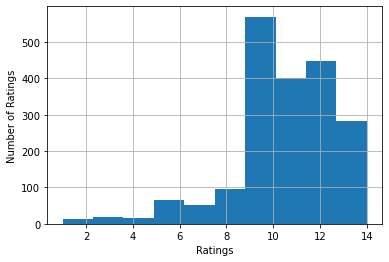

In [122]:
# drop two extreme values and creat a new df_rating for better plot
df_rating = df[df.rating<420]
ax = df_rating.rating.hist(figsize=(6, 4))
ax.set_xlabel("Ratings")
ax.set_ylabel("Number of Ratings");

Most ratings range from 9-14.

### 4.3 Dog name
**For those who have names, Charlie, Oliver and Cooper are the top one choices.**

In [123]:
df.name.value_counts()

None       620
Charlie     10
Oliver      10
Cooper      10
Lucy         9
          ... 
Beckham      1
Mya          1
Ulysses      1
Laika        1
Blu          1
Name: name, Length: 913, dtype: int64

In [124]:
df[df.name!='None']

,tweet_id,timestamp,source,text,rating,name,favorites,re_tweets,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,Phineas,35120,7404,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,Tilly,30393,5513,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,Archie,22849,3638,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,Darla,38403,7582,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,Franklin,36656,8159,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,666691418707132416,2015-11-17 18:56:35+00:00,Twitter for iPhone,This is Christoper. He is a spotted Penne. Can easily navigate stairs. 8/10 https://t.co/bg4TqvvkuF,8.0,Christoper,170,44,https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg,1,German_shepherd,0.975401,True,Beagle,0.008687,True,Bloodhound,0.005394,True,NaN
1923,666644823164719104,2015-11-17 15:51:26+00:00,Twitter for iPhone,This is Jimothy. He is a Botwanian Gouda. Can write (impressive). Very erect tail. Still looking for hoco date. 9/10 https://t.co/LEkZjZxESQ,9.0,Jimothy,218,73,https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg,1,Ibizan_hound,0.044333,True,Pembroke,0.043209,True,West_highland_white_terrier,0.038906,True,NaN
1924,666454714377183233,2015-11-17 03:16:00+00:00,Twitter for iPhone,I'll name the dogs from now on. This is Kreggory. He does parkour. 10/10 https://t.co/uPqPeXAcua,10.0,Kreggory,469,193,https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg,1,Dalmatian,0.278954,True,Labrador_retriever,0.237612,True,Great_pyrenees,0.171106,True,NaN
1925,666447344410484738,2015-11-17 02:46:43+00:00,Twitter for iPhone,This is Scout. She is a black Downton Abbey. Isn't afraid to get dirty. 9/10 nothing bad to say https://t.co/kH60oka1HW,9.0,Scout,94,18,https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg,1,Curly-coated_retriever,0.322084,True,Giant_schnauzer,0.287955,True,Labrador_retriever,0.166331,True,NaN


### 4.4 Popular Dog breed
**Most popular dog breeds are Golden retriever, Labrador retriever, Welsh Corgi (Pembroke and  Cardigan), Chihuahua and Pug.**   

In [125]:
# Return p1 predictions that are true
df[df.p1_dog==True].p1.value_counts()

Golden_retriever      136
Labrador_retriever     92
Pembroke               88
Chihuahua              78
Pug                    54
                     ... 
Standard_schnauzer      1
Clumber                 1
Silky_terrier           1
Scotch_terrier          1
Entlebucher             1
Name: p1, Length: 111, dtype: int64

In [126]:
# Return p2 predictions that are true
df[df.p2_dog==True].p2.value_counts()

Labrador_retriever          95
Golden_retriever            81
Cardigan                    72
Chihuahua                   43
Chesapeake_bay_retriever    40
                            ..
Affenpinscher                1
Japanese_spaniel             1
Komondor                     1
Entlebucher                  1
Kerry_blue_terrier           1
Name: p2, Length: 113, dtype: int64

In [127]:
# Return p3 predictions that are true
df[df.p3_dog==True].p3.value_counts()

Labrador_retriever    75
Chihuahua             57
Golden_retriever      45
Eskimo_dog            36
Kelpie                33
                      ..
Kerry_blue_terrier     1
Standard_schnauzer     1
Sussex_spaniel         1
Irish_wolfhound        1
Affenpinscher          1
Name: p3, Length: 116, dtype: int64

### 4.5 Source
**Most of the tweets were sent from Iphone**

In [128]:
df.source.value_counts()

Twitter for iPhone    1924
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64